**Name:** Keval R Shah  
**SAP:** 60009220061  
**Batch :** D2-1  
**Lab:** ML Lab 5

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/brfss2013_sample.csv')
df.head(5)

,X_state,fmonth,idate,imonth,iday,iyear,X_age_g,X_rfchol
0,Alabama,January,1092013,January,9,2013,Age 55 to 64,Yes
1,Alabama,January,1192013,January,19,2013,Age 45 to 54,No
2,Alabama,January,1192013,January,19,2013,Age 55 to 64,No
3,Alabama,January,1112013,January,11,2013,Age 55 to 64,Yes
4,Alabama,February,2062013,February,6,2013,Age 65 or older,No


In [ ]:
df.isna().sum()

X_state      0
fmonth       0
idate        0
imonth       0
iday         0
iyear        0
X_age_g      0
X_rfchol    11
dtype: int64

In [ ]:
columns = ['X_state', 'fmonth', 'imonth', 'X_age_g', 'X_rfchol']
label_encoder = LabelEncoder()

for col in columns:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df.head(5)

,X_state,fmonth,idate,imonth,iday,iyear,X_age_g,X_rfchol
0,0,4,1092013,4,9,2013,4,1
1,0,4,1192013,4,19,2013,3,0
2,0,4,1192013,4,19,2013,4,0
3,0,4,1112013,4,11,2013,4,1
4,0,3,2062013,3,6,2013,5,0


In [ ]:
df1 = df.drop(['idate', 'iyear','X_state'], axis=1)

In [ ]:
df1.head()

,fmonth,imonth,iday,X_age_g,X_rfchol
0,4,4,9,4,1
1,4,4,19,3,0
2,4,4,19,4,0
3,4,4,11,4,1
4,3,3,6,5,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = df1.drop('X_rfchol', axis=1)
y = df1['X_rfchol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
train_accuracy = clf.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

test_accuracy = clf.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9714285714285714
Testing Accuracy: 0.5333333333333333


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
feature_imp = pd.Series(clf.feature_importances_, index=df1.columns[:-1]).sort_values(ascending=False)
print(feature_imp)

iday       0.425096
X_age_g    0.228440
fmonth     0.177720
imonth     0.168744
dtype: float64


Text(0.5, 1.0, 'Feature Importances')

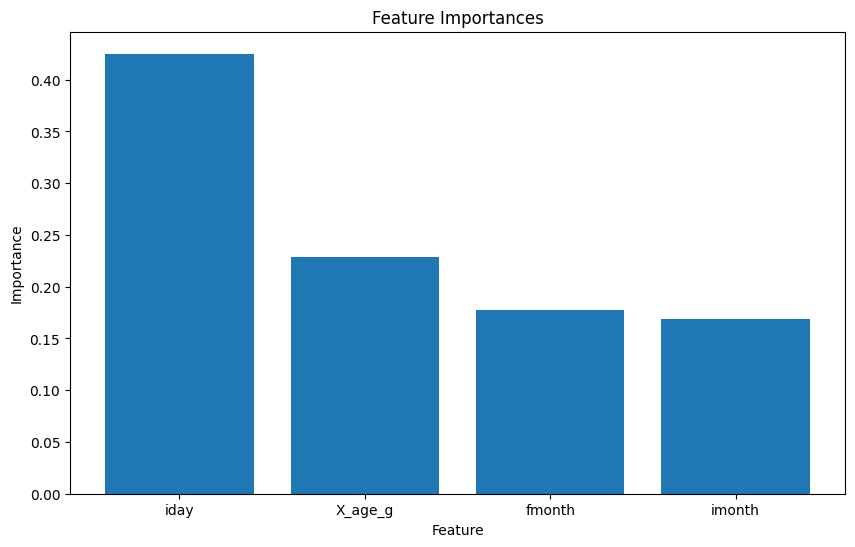

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(feature_imp.index, feature_imp.values)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')

In [ ]:
df1.columns

Index(['fmonth', 'imonth', 'iday', 'X_age_g', 'X_rfchol'], dtype='object')

In [ ]:
X = df[['fmonth','iday','X_age_g']]
y = df['X_rfchol']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
y_train_pred = clf.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
y_test_pred = clf.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 0.9733333333333334
Testing Accuracy: 0.6


**Conclusion :** Thus it can be seen that after using feature selection the the accuracy of the model has increased and it can be valuable technique in selecting appropriate features for our model